In [87]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
#선형회귀 - 최소제곱법
from sklearn.linear_model import LinearRegression

In [88]:
dataset = pd.read_csv('data/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [89]:
#독립변수
X = dataset.iloc[:, :-1].values
X.shape #공부시간

#종속변수
y = dataset.iloc[:, -1].values
y #점수

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100,  98, 100])

In [90]:
reg = LinearRegression()
reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
#9시간 공부했을때 점수
pred = reg.predict([[9]])
print(pred[0], pred.shape)

87.50951711379335 (1,)


In [92]:
#8시간, 7시간, 5시간 공부했을때 점수
pred=reg.predict([[8], [7], [5]])
print(pred.shape, pred[0], pred[1], pred[2])

(3,) 79.56490004438926 71.62028297498517 55.731048836176996


In [93]:
import math
import numpy as np
max = math.ceil(X.max())
xticks = [x for x in np.arange(0, max+1, 0.5)]
xticks, max

([np.float64(0.0),
  np.float64(0.5),
  np.float64(1.0),
  np.float64(1.5),
  np.float64(2.0),
  np.float64(2.5),
  np.float64(3.0),
  np.float64(3.5),
  np.float64(4.0),
  np.float64(4.5),
  np.float64(5.0),
  np.float64(5.5),
  np.float64(6.0),
  np.float64(6.5),
  np.float64(7.0),
  np.float64(7.5),
  np.float64(8.0),
  np.float64(8.5),
  np.float64(9.0),
  np.float64(9.5),
  np.float64(10.0),
  np.float64(10.5),
  np.float64(11.0),
  np.float64(11.5)],
 11)

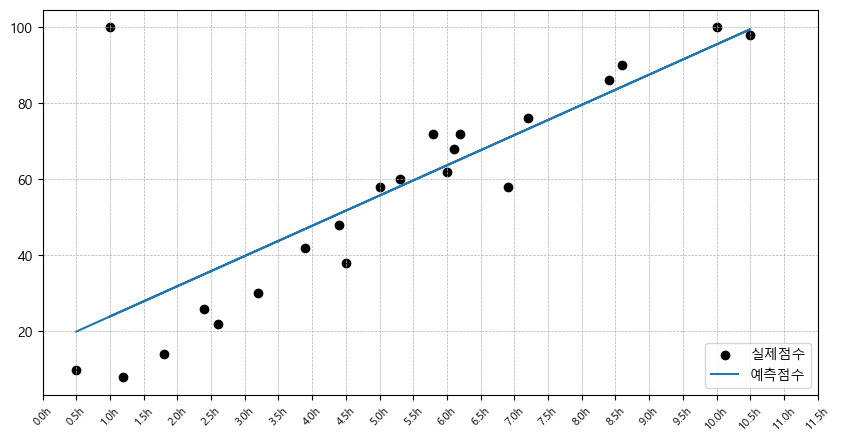

In [94]:
#실제점수와 예측점수를 시각화
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='black', label = '실제점수')
plt.plot(X, reg.predict(X), label='예측점수')
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.xticks(xticks, [f'{x}h' for x in xticks], size=8, rotation=45)
plt.show()

In [95]:
#y= mx + b 
m=reg.coef_
b=reg.intercept_
y1= m * 9 + b
y1

array([87.50951711])

In [96]:
reg.predict([[9]])

array([87.50951711])

In [97]:
#선형회귀(경사하강법)
from sklearn.linear_model import SGDRegressor

In [98]:
X.shape, y.shape

((22, 1), (22,))

In [99]:
sr = SGDRegressor()
sr.fit(X, y)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [100]:
#9시간 공부했을때 점수
sr.predict([[9]]) , reg.predict([[9]])

(array([88.66855469]), array([87.50951711]))

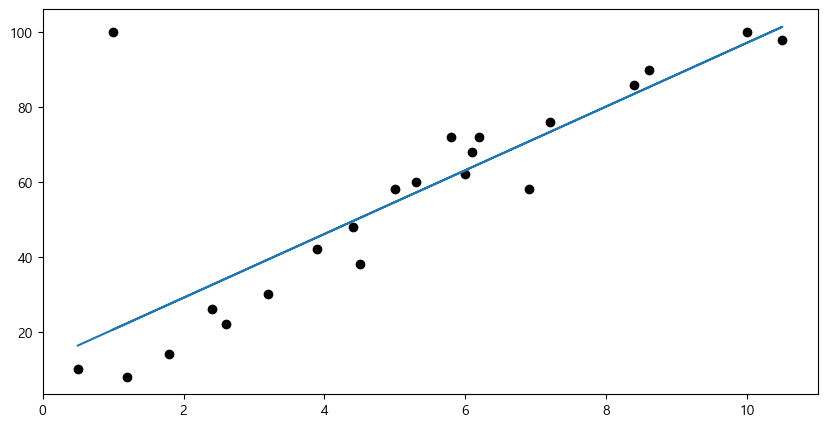

In [101]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='black')
plt.plot(X, sr.predict(X))
plt.show()

In [102]:
sr.score(X, y) , reg.score(X, y)

(0.5852662650265965, 0.5896028693137483)

In [103]:
sr.coef_ , reg.coef_ , sr.intercept_ , reg.intercept_

(array([8.50952262]),
 array([7.94461707]),
 array([12.08285107]),
 np.float64(16.007963489156545))

In [104]:
sr = SGDRegressor(max_iter=1500, eta0=0.0001, random_state=0, verbose=1)
sr.fit(X, y)

-- Epoch 1
Norm: 0.42, NNZs: 1, Bias: 0.068941, T: 22, Avg. loss: 1923.504719
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.72, NNZs: 1, Bias: 0.117862, T: 44, Avg. loss: 1804.001484
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 1, Bias: 0.159928, T: 66, Avg. loss: 1712.422791
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 1, Bias: 0.197451, T: 88, Avg. loss: 1633.991026
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.42, NNZs: 1, Bias: 0.231958, T: 110, Avg. loss: 1564.879431
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.61, NNZs: 1, Bias: 0.264029, T: 132, Avg. loss: 1502.274723
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 1, Bias: 0.294202, T: 154, Avg. loss: 1445.211057
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.97, NNZs: 1, Bias: 0.322722, T: 176, Avg. loss: 1392.617425
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.14, NNZs: 1, Bias: 0.349850, T: 198, Avg. loss: 1344.011991
Total trainin

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1500
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


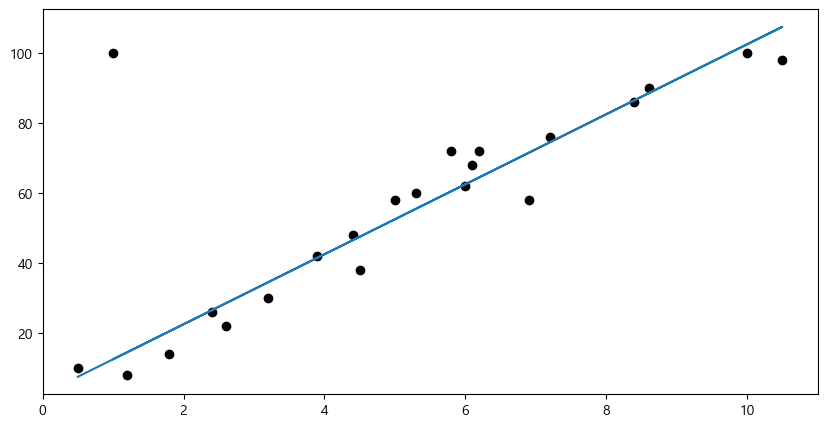

In [105]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='black')
plt.plot(X, sr.predict(X))
plt.show()

In [106]:
import warnings
warnings.filterwarnings('ignore')

In [107]:
def model_sgd(iter, eta0):
    sr = SGDRegressor(max_iter=iter, eta0=eta0, random_state=0)
    sr.fit(X, y)

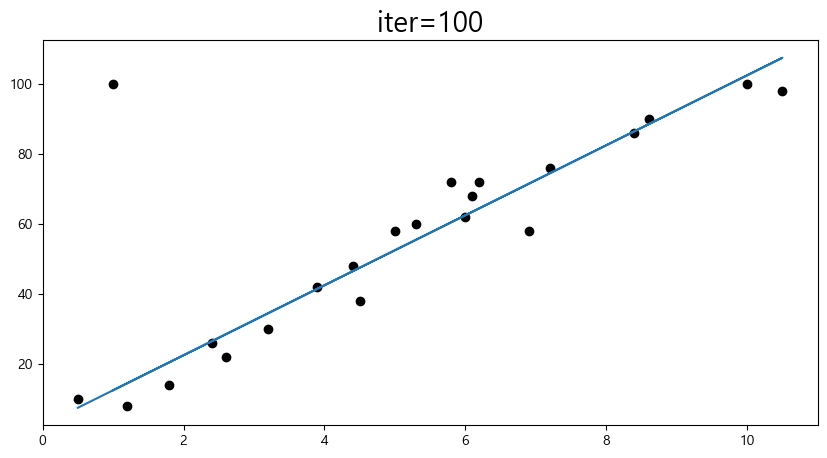

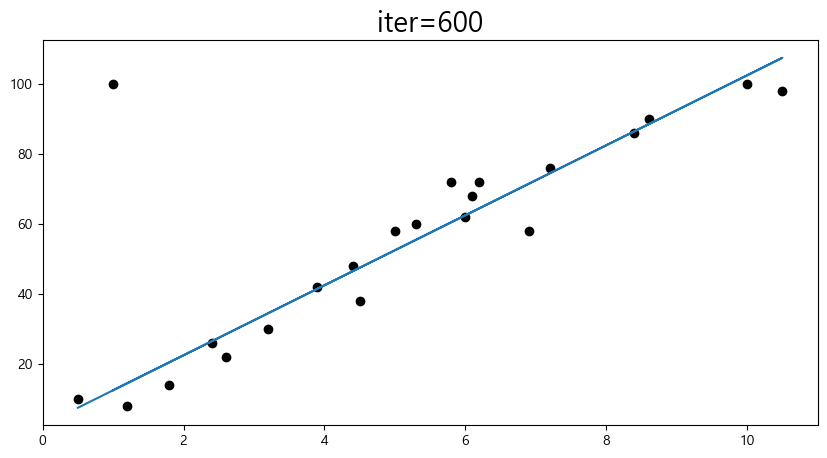

In [108]:
import time
for i in range(100, 1001, 500):
    model_sgd(i, 0.0001)
    time.sleep(3)
    plt.figure(figsize=(10,5))
    plt.scatter(X, y, color='black')
    plt.plot(X, sr.predict(X))
    plt.title(f'iter={i}', size=20)
    plt.show()
    plt.close()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [113]:
X_train.shape, X_test.shape, X.shape

((17, 1), (5, 1), (22, 1))

In [115]:
sr = SGDRegressor()
sr.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [ ]:
X_test, sr.predict(X_test) #공부시간과 예측점수

(array([[10.5],
        [ 5.3],
        [ 6.2],
        [ 6.1],
        [ 1.2]]),
 array([101.58881594,  57.13371082,  64.82786363,  63.97295776,
         22.08257025]))